**Titanic_train(Classification)**

**Name**:-  Samir Chaulagain

**University ID**:-  2066031

**Module leader**:- Siman Giri

**Tutor**:- Anmol Adhikari

### Overview

- In order to estimate the profitability of survived individual, we will use the concept of logistic regression and the dataset of titanic Train.

# 1. Data Understanding

### Importing libraries
We will be using: NumPy, pandas,matplotlib, seaborn,sklearn.

In [65]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the df_company
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

###Importing the dataset


As we have downloaded a “titanic_train.csv” file, we shall be using Pandas to store that data in a variable.

# **Explaining Dataset**
The Titanic dataset includes data on the people who boarded the ship during its tragic voyage. Many data analysis and machine learning projects have made use of the dataset, which is from the Kaggle website.This dataset is commonly used in data analysis and machine learning projects because it provides a rich set of variables that can be used to build models to predict survival. Additionally, the dataset is relatively small in size, making it easy to work with and suitable for educational purposes.

Variable	Definition	Key

1. Survived: A binary variable that indicates whether the passenger survived (1) or not (0).
2. Pclass: The class of the passenger's ticket. The classes were 1st, 2nd, and 3rd.
3. Name: The name of the passenger.
4. Sex: The gender of the passenger (male or female).
5. Age: The age of the passenger.
6. SibSp: The number of siblings or spouses the passenger had on board the Titanic.
7. Parch: The number of parents or children the passenger had on board the Titanic.
8. Ticket: The ticket number of the passenger.
9. Fare: The fare paid by the passenger.
10. Cabin: The cabin number of the passenger.
11. Embarked: The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).

In [66]:
from google.colab import drive # used to mount Google Drive in Google Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
df_titanicTrain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProtfolioAI/13classification.csv') #loads it into a pandas dataframe named 

In [68]:
len(df_titanicTrain) #numdber of entries

891

**View the data using head function which returns top rows**

In [69]:
df_titanicTrain.info() #info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [70]:
df_titanicTrain.head()# View the data using head function which returns top rows

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


The meaning of the values (SibSp, Parch) can be found on the website from which we have downloaded the dataset.

We have learned from Kaggle while downloading the data set, that the data has 891 rows and 12 columns.

Now, let’s check how many cells are left empty in the table.

In [71]:
df_titanicTrain.sample(5) #display a random sample of 5 rows

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
223,3,male,NaN,0,0,7.8958,NaN,S,0
713,3,male,29.0,0,0,9.4833,NaN,S,0
816,3,female,23.0,0,0,7.9250,NaN,S,0
289,3,female,22.0,0,0,7.7500,NaN,Q,1
137,1,male,37.0,1,0,53.1000,C123,S,0


In [72]:
df_titanicTrain.index # uniquely identify each row in the dataframe.

RangeIndex(start=0, stop=891, step=1)

In [73]:
df_titanicTrain.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

In [74]:
df_titanicTrain.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# 2. Exploratory Data Analysis



<p>We found out a lot of the Cabin data is missing, and a significant Age data is missing.</p>
<p>We might need to remove the entire cabin column as the imbalance might lead to over/under sampling</p>

<h3>Survived</h3>

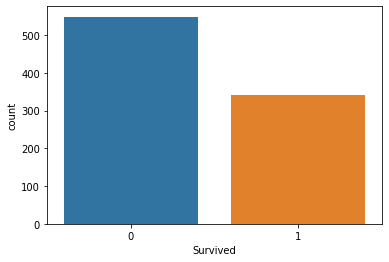

In [75]:

sns.countplot(x='Survived',data=df_titanicTrain)#plotting  countplot

<p>A quick plot count to glance the rough ratio of survivor and victim </p>
    

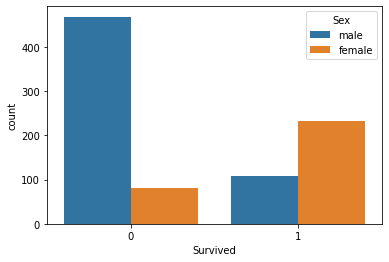

In [76]:
sns.countplot(x='Survived',data=df_titanicTrain, hue='Sex') # Plotting a countplot using the seaborn library
# x = the categorical column 'Survived' from the dataframe 'df_titanicTrain'
# data = the data source 'df_titanicTrain'
# hue = the categorical column 'Sex' from the dataframe 'df_titanicTrain'

**See age group of passengeres travelled **<br>
Note: We will use displot method to see the histogram. However some records does not have age hence the method will throw an error. In order to avoid that we will use dropna method to eliminate null values from graph

In [77]:
#Check for null
df_titanicTrain.isnull()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,True,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False


In [78]:
df_titanicTrain.isna()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,True,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False


<p>Separating survival data with genders by adding hue. </p>
<br>
<h3>Sex</h3>
Lets try seeing the initial passenger data based on gender proportion

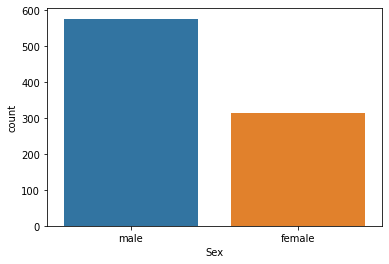

In [79]:
sns.countplot(x='Sex',data=df_titanicTrain) #plotting countplot

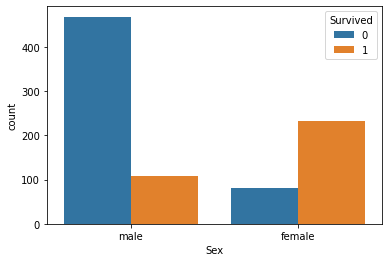

In [80]:
sns.countplot(x='Sex',data=df_titanicTrain, hue='Survived')# Plotting a countplot using the seaborn library
# x = the categorical column 'Sex' from the dataframe 'df_titanicTrain'
# data = the data source 'df_titanicTrain'
# hue = the categorical column 'Survived' from the dataframe 'df_titanicTrain'


<p>Adding hue to survival status, we see male passengers are way more likely to not survive</p>
<br>
<h2>Passenger Class</h2>
<p>Lets try to separate them based on Passenger class data</p>

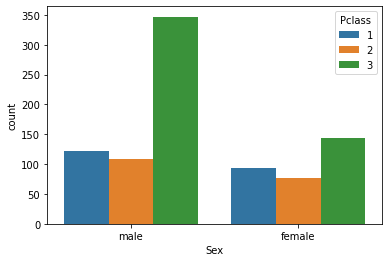

In [81]:

sns.countplot(x='Sex',data=df_titanicTrain, hue='Pclass') # Plotting a countplot using the seaborn library
# x = the categorical column 'Sex' from the dataframe 'df_titanicTrain'
# data = the data source 'df_titanicTrain'
# hue = the categorical column 'Pclass' from the dataframe 'df_titanicTrain'

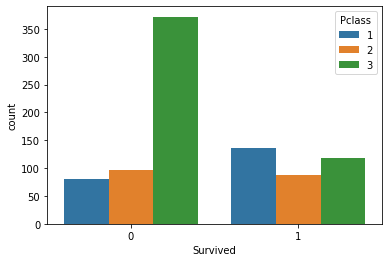

In [82]:
sns.countplot(x='Survived',data=df_titanicTrain, hue='Pclass') # Plotting a countplot using the seaborn library
# x = the categorical column 'survivde' from the dataframe 'df_titanicTrain'
# data = the data source 'df_titanicTrain'
# hue = the categorical column 'Pclass' from the dataframe 'df_titanicTrain'

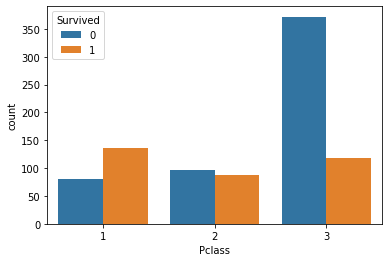

In [83]:
sns.countplot(x='Pclass',data=df_titanicTrain, hue='Survived') # Plotting a countplot using the seaborn library
# x = the categorical column 'Pclass' from the dataframe 'df_titanicTrain'
# data = the data source 'df_titanicTrain'
# hue = the categorical column 'Survived' from the dataframe 'df_titanicTrain'

<p>Third Class passengers were more likely to die in the incident. However, it might be due to high proportion of male passengers there as well.</p>
<p>First class passengers has most likelihood to survive. And the Third Class passengers has lowest likelihood of survival</p>
<br>
<p>Lets now see passengers age distribution data</p>

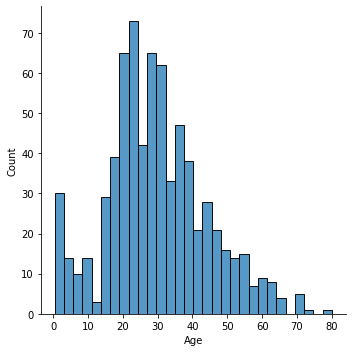

In [84]:
sns.displot(df_titanicTrain['Age'].dropna(),kde=False,bins=30) # Display showing the probability density function of the data.

<p>We observe a Normal Distribution curve, with Mean in between 20-30.</p>


In [85]:
df_titanicTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


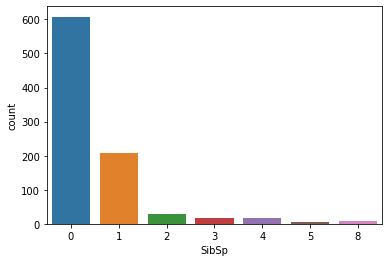

In [86]:

sns.countplot(x="SibSp",data=df_titanicTrain) #plotting count plot of SibSp of column

<p>Most people in the Titanice has zero Sibling/Spouse, which suggested they might be solo traveler.</p>
<p> I hypothesized the high number of 0 SibSp is probably related to the high level of males in the third class passengers.</p>

<p>Lets try to dig deeper into the hypothesis</p>

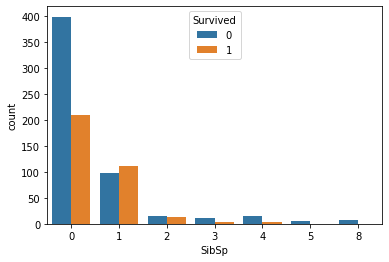

In [87]:
sns.countplot(x="SibSp",data=df_titanicTrain,hue="Survived") # Plotting a countplot using the seaborn library
# x = the categorical column 'SibSp' from the dataframe 'df_titanicTrain'
# data = the data source 'df_titanicTrain'
# hue = the categorical column 'Survived' from the dataframe 'df_titanicTrain'

<p>Small observation that people with only 1 spouse/siblings has higher survival ratio than other SibSp category</p>

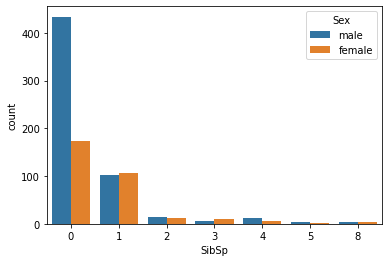

In [88]:
sns.countplot(x="SibSp",data=df_titanicTrain,hue="Sex")# Plotting a countplot using the seaborn library
# x = the categorical column 'SibSp' from the dataframe 'df_titanicTrain'
# data = the data source 'df_titanicTrain'
# hue = the categorical column 'Sex' from the dataframe 'df_titanicTrain'


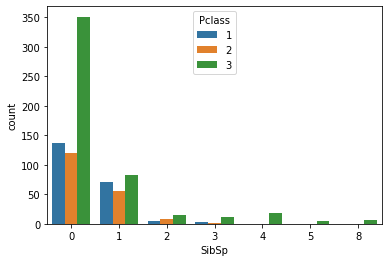

In [89]:
sns.countplot(x="SibSp",data=df_titanicTrain,hue="Pclass") # Plotting a countplot using the seaborn library
# x = the categorical column 'SibSp' from the dataframe 'df_titanicTrain'
# data = the data source 'df_titanicTrain'
# hue = the categorical column 'Pclass' from the dataframe 'df_titanicTrain'

<p> The data above prove the hypothesis that the high number of 0 SibSp is probably related to the high level of males in the third class passengers.</p>
<br>
<p>Lets try to see distribution of fare people pay to get on board.</p>

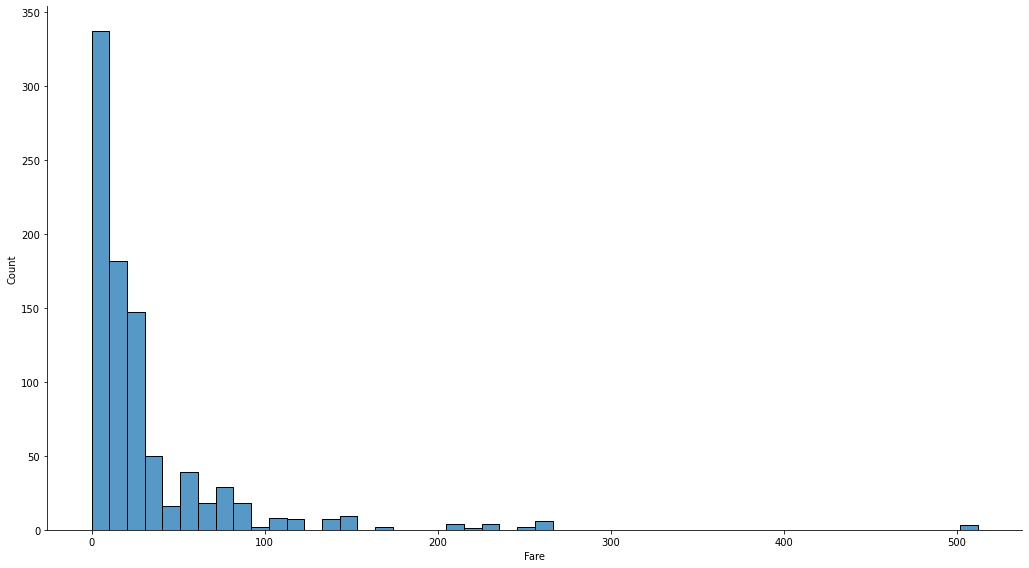

In [90]:

sns.displot(df_titanicTrain['Fare'].dropna(),kde=False,bins=50,height=8,aspect=1.8) # Create a histogram of the Fare column

<p>Majority of Titanic passengers pay the cheapest fare, which falls under the first bin.</p>

# Data Cleaning
<p>So firstly, we found out that a significant portion of age was missing from the data set. Instead of dropping all the missing ages, we can simply fill in the age with the mean age.</p>


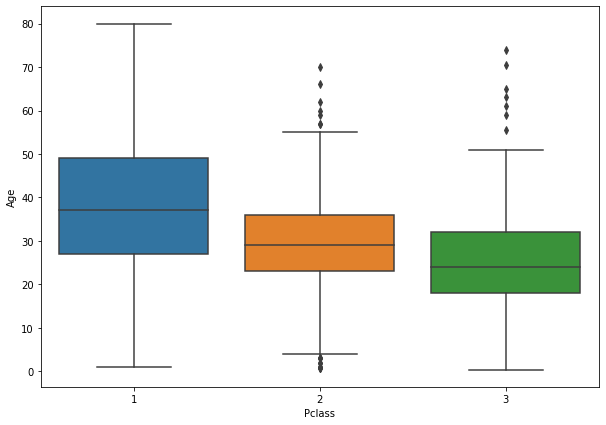

In [91]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df_titanicTrain)#ploting boxplot

<p>Each passenger class has different age spread, probably due to wealthier passengers were usually older.</p>
<p>Now we are ready to impute by making a function</p>

In [92]:
pclass_age_mean = df_titanicTrain.groupby('Pclass')['Age'].mean()
print(pclass_age_mean) #grouped Pclass and Age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [93]:
def impute_age(cols):
    Age = cols[0] #1st column
    Pclass=cols[1] #2nd column
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [94]:
df_titanicTrain['Age'] = df_titanicTrain[['Age','Pclass']].apply(impute_age,axis=1) # Impute the missing values in the Age column using the impute_age function

The Age data has now been cleaned, as we had imputed the nulls with average age of respective passenger classes.We will also write imputation method for Fare, as it is needed for the test data.


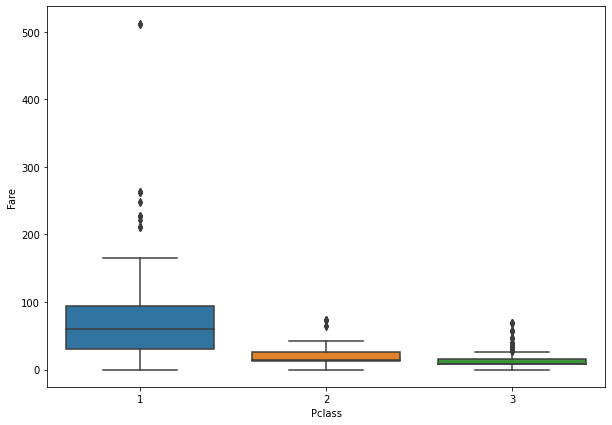

In [95]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Fare',data=df_titanicTrain) #plotting boxplot

In [96]:
pclass_fare_mean = df_titanicTrain.groupby('Pclass')['Fare'].mean()
print(pclass_fare_mean) #grouping column Pclass and Fare 

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


impute average age values to null age values:

In [97]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
      # Get the mean age of passengers in the same Pclass
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
         # If the value in the Age column is not missing, return the original value
    else:
        return Age

call the function

In [98]:
df_titanicTrain["Age"] = df_titanicTrain[["Age", "Pclass"]].apply(add_age,axis=1) # Assigns the result of the "add_age" function applied to the "Age" and "Pclass" columns to the "Age" column of the "df_titanicTrain" dataframe.

We have lots of null values for Cabin column, so we just remove it.

In [99]:
df_titanicTrain.drop("Cabin",inplace=True,axis=1) # removes the "Cabin" column

Finally, we remove some rows with null values:

In [100]:
df_titanicTrain.dropna(inplace=True) #used to remove rows or columns in a DataFrame that contain missing values.

In [101]:
pd.get_dummies(df_titanicTrain["Sex"]) #represent categorical variables as numerical data 

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


<p>One of the two columns above is redundant because we only need one column to identify sex. Having two columns will introduce multicollinearity, as the two columns are perfect predictors of each other.</p>

In [102]:
sex = pd.get_dummies(df_titanicTrain['Sex'],drop_first=True) #convert categorical variables into numerical values.

In [103]:
embarked = pd.get_dummies(df_titanicTrain["Embarked"],drop_first=True)
pclass = pd.get_dummies(df_titanicTrain["Pclass"],drop_first=True)

We add these variables to the dataset:

In [104]:
train = pd.concat([df_titanicTrain,pclass,sex,embarked],axis=1) ## Concatenate the df_titanicTrain dataframe with the pclass, sex, and embarked dataframes

Then, we remove some columns that we are not going to use for our model.

In [105]:
df_titanicTrain.drop(["Pclass","Sex","Embarked"],axis=1,inplace=True) # Drop the Pclass, Sex, and Embarked columns from the df_titanicTrain dataframe

In [413]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,2,3,male,Q,S
0,3,male,22.0,1,0,7.2500,S,0,0,1,1,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0,0,0,0
2,3,female,26.0,0,0,7.9250,S,1,0,1,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0,0,0,1
4,3,male,35.0,0,0,8.0500,S,0,0,1,1,0,1


<p>We also need to convert Pclass into dummy variables as well. We will do that later</p>

#3. LOGISTIC REGRESSION(Build primary model)



In [107]:
X= df_titanicTrain.drop('Survived',axis=1) # Assign features to X by dropping the Survived column from df_titanicTrain
y=df_titanicTrain['Survived'] ## Assign the target variable to y by extracting the Survived column from df_titanicTrain

In [108]:
from sklearn.model_selection import train_test_split # Import the train_test_split function from the sklearn.model_selection module

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19) ## Split the data into training and test sets

In [395]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000, num_classes=5):
       # Initialize the hyperparameters for the logistic regression model
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.num_classes = num_classes
        # Calculate the softmax function
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    
    def one_hot_encoding(self, y):
      # Perform one-hot encoding on the target variable
        one_hot = np.zeros((y.shape[0], self.num_classes))
        one_hot[np.arange(y.shape[0]), y] = 1
        return one_hot
    
    def loss(self, h, y_encoded):
      # Calculate the cross-entropy loss for the model
        return -np.mean(y_encoded * np.log(h))
    
    def fit(self, X, y):
      # Add a column of ones to X to represent the bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.zeros((X.shape[1], self.num_classes))
        y_encoded = self.one_hot_encoding(y)
         # Train the model using gradient descent 
        for i in range(self.num_iterations):
            z = X @ self.weights
            h = self.softmax(z)
            gradient = X.T @ (h - y_encoded) / y.size
            self.weights -= self.learning_rate * gradient
           
    def predict_probability(self, X):
        # Add a column of ones to X to represent the bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        z = X @ self.weights
        # Return the predicted class probabilities
        return self.softmax(z)
    
    def predict(self, X):
        # Return the predicted class labels
        return np.argmax(self.predict_probability(X), axis=1)

Train a logistic regression model

In [396]:
logmodel= LogisticRegression();

In [397]:
logmodel.fit(X_train,y_train)

#4. Model Evaluation

# Prediction

In [398]:
predictions = logmodel.predict(X_test)  # generate predictions for the test data.

In [399]:
from sklearn.metrics import classification_report  

In [400]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       175
           1       0.83      0.22      0.34        92

    accuracy                           0.72       267
   macro avg       0.77      0.60      0.58       267
weighted avg       0.75      0.72      0.66       267



In [401]:
from sklearn.metrics import confusion_matrix

In [402]:
confusion_matrix(y_test,predictions) # Compute the confusion matrix

array([[171,   4],
       [ 72,  20]])

In [403]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

- In model evaluation we can use  various metrics, such as accuracy, precision, recall, and F1 score, to assess the model's performance. To determine whether a model is overfitting or underfitting, compare its performance on the training set to its performance on the test set.

In [404]:
from sklearn.metrics import classification_report #importing sklearn.metrics

In [405]:
print(classification_report(y_test,predictions))  #evaluate the performance of a binary classification model.

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       175
           1       0.83      0.22      0.34        92

    accuracy                           0.72       267
   macro avg       0.77      0.60      0.58       267
weighted avg       0.75      0.72      0.66       267



# Accuracy

In [406]:
from sklearn.metrics import accuracy_score  #accuracy of the binary classification model on the test data

In [407]:
#calculates the accuracy of the model

accuracy = accuracy_score(predictions, y_test)

print(f"The accuracy on test set using Logistic Regression is: {np.round(accuracy, 3)*100.0}%")

The accuracy on test set using Logistic Regression is: 71.5%


# 5. **Dimensionality** Reuction

In [408]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

# Fit and transform the first_train dataset using the sc instance of StandardScaler
first_train1 = pca.fit_transform(X_train)

# Transform the first_test dataset using the sc instance of StandardScaler
first_test1 = pca.transform(X_test)

# Create an instance of the LogisticRegression class
log_reg1 = LogisticRegression()

# Fit the logistic regression model to the first_train and second_train datasets
log_reg1.fit(first_train1, y_train)

# predicting the target vectors
second_pred1=log_reg1.predict(first_test1)

# Predict the target values for the first_test dataset using the trained logistic regression model
log_reg_pred1 = log_reg1.predict(first_test1)

# Create a dataframe to display the actual target values and the predicted target values
result1 = pd.DataFrame(np.c_[y_test, log_reg_pred1], columns=['Actual', 'Predicted'])

# Display the first 5 rows of the result dataframe
result1.sample(15)

,Actual,Predicted
114,1,1
0,0,0
161,1,1
219,1,0
103,0,0
197,0,0
46,0,0
65,0,0
203,0,0
243,0,0


In [409]:
# getting precision, recall and f1-score via classification report using PCA

print(classification_report(y_test, second_pred1))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80       175
           1       0.62      0.39      0.48        92

    accuracy                           0.71       267
   macro avg       0.68      0.63      0.64       267
weighted avg       0.69      0.71      0.69       267



In [410]:
# Calculate the accuracy of the logistic regression model using PCA
accuracy1 = accuracy_score(second_pred1, y_test)

# Print the accuracy of the model, rounded to 3 decimal places and expressed as a percentage using PCA
print(f"The accuracy on test set using Logistic Regression(With PCA) is: {np.round(accuracy1, 3)*100.0}%")

The accuracy on test set using Logistic Regression(With PCA) is: 70.8%


# Confusion Matrix

- It summarizes the number of correct and incorrect predictions made by the model on the test data.The confusion matrix obtained by training a classifier and evaluating the trained model on this test dataset.
- In Python, we ahe option to output the confusion matrix as a heatmap using the ConfusionMatrixDisplay function, visually showcasing which cases have a more significant error rate. However, to use the heatmap, it is wiser to use a normalized confusion matrix because the dataset may be imbalanced. Thus, the representation in such cases might not be accurate. 

In [411]:
confusion_matrix(y_test, predictions) # compute various metrics

array([[171,   4],
       [ 72,  20]])

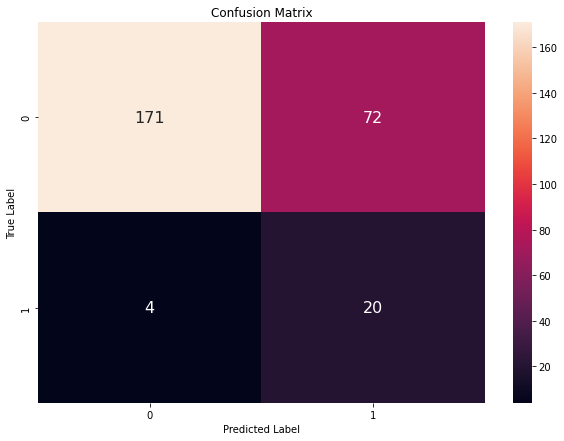

In [412]:
# creating confusion matrix heatmap


# Create a DataFrame of the confusion matrix with the "confusion_matrix" function
conf_mat = pd.DataFrame(confusion_matrix(predictions, y_test))

# Create a figure with a specific size using matplotlib's "figure" function
fig = plt.figure(figsize=(10,7))

# Plot the confusion matrix as a heatmap using seaborn's "heatmap" function
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')

# Add a title to the plot using matplotlib's "title" function
plt.title("Confusion Matrix")

# Label the x-axis using matplotlib's "xlabel" function
plt.xlabel("Predicted Label")

# Label the y-axis using matplotlib's "ylabel" function
plt.ylabel("True Label")

# Display the plot using matplotlib's "show" function
plt.show()

# **Conclusion**

- The Titanic dataset from Kaggle is a well-known dataset used for predictive modeling and machine learning. Logistic regression is a commonly used method for binary classification problems, such as the problem of predicting survival on the Titanic.In the context of the Titanic dataset, the logistic regression model can be trained on the available features, such as passenger age, fare, and class, to predict whether a passenger survived or not. Based on its accuracy, precision, recall, and F1 score, the logistic regression model can be evaluated on the Titanic dataset. Overall, logistic regression can be a useful tool for analyzing the Titanic dataset and making predictions about passenger survival. However, it's important to keep in mind that the performance of the model can be influenced by the choice of features, the sample size, and the presence of outliers or confounding variables in the data.
- The accuracy of this module is concluded to be 70.8%


To improve things in this model for future:
1. Use categorical data of Pclass. (use dummy variables instead of 1,2,3).
2. Remove Embarked dummy variables and replace with categorical Pclass dummy variables
